# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [20]:
# Import library dasar
import pandas as pd
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing dan model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [21]:
# Memuat dataset
file_path = '/content/clustered_data.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dataset
print(df.head())


   gender  lunch  test preparation course  reading score  writing score  \
0     0.0    1.0                      1.0       0.662651       0.711111   
1     0.0    1.0                      0.0       0.879518       0.866667   
2     0.0    1.0                      1.0       0.939759       0.922222   
3     1.0    0.0                      1.0       0.481928       0.377778   
4     1.0    1.0                      1.0       0.734940       0.722222   

   Cluster  
0        4  
1        2  
2        4  
3        0  
4        1  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [22]:
# Memisahkan fitur dan label
X = df.drop(columns=['Cluster'])  # Semua kolom kecuali 'Cluster'
y = df['Cluster']  # Kolom label

# Membagi dataset menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")


Jumlah data latih: 800, Jumlah data uji: 200


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [23]:
# Bagian 1: Pelatihan Model
print("Melatih model...")

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Model KNN telah dilatih.")

# Decision Tree (DT)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Model Decision Tree telah dilatih.")

# Random Forest (RF)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print("Model SVM telah dilatih.")

# Naive Bayes (NB)
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Model Naive Bayes telah dilatih.")

print("\nSemua model telah selesai dilatih.")


Melatih model...
Model KNN telah dilatih.
Model Decision Tree telah dilatih.
Model Random Forest telah dilatih.
Model SVM telah dilatih.
Model Naive Bayes telah dilatih.

Semua model telah selesai dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [24]:
# Fungsi untuk mengevaluasi model dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    # Prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Menghitung Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menghitung metrik evaluasi
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),  # Untuk multi-class
        'Recall': recall_score(y_test, y_pred, average='weighted'),        # Untuk multi-class
        'F1-Score': f1_score(y_test, y_pred, average='weighted')           # Untuk multi-class
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil evaluasi
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil evaluasi
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame hasil evaluasi
print(summary_df)


                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)       1.0        1.0     1.0       1.0
1            Decision Tree (DT)       1.0        1.0     1.0       1.0
2            Random Forest (RF)       1.0        1.0     1.0       1.0
3  Support Vector Machine (SVM)       1.0        1.0     1.0       1.0
4              Naive Bayes (NB)       1.0        1.0     1.0       1.0


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

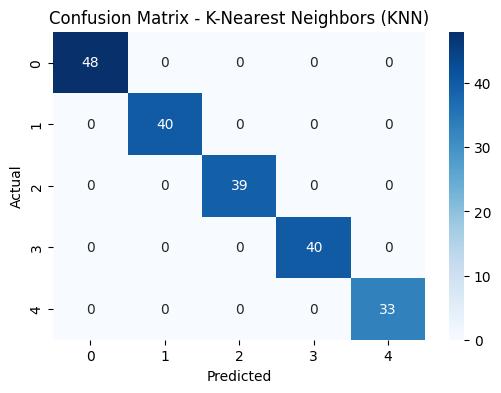

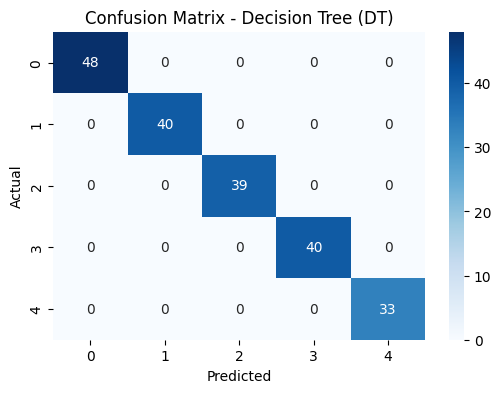

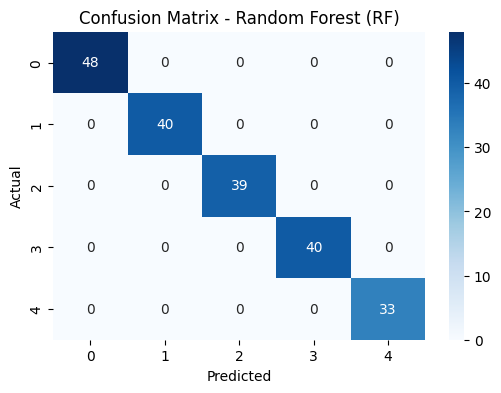

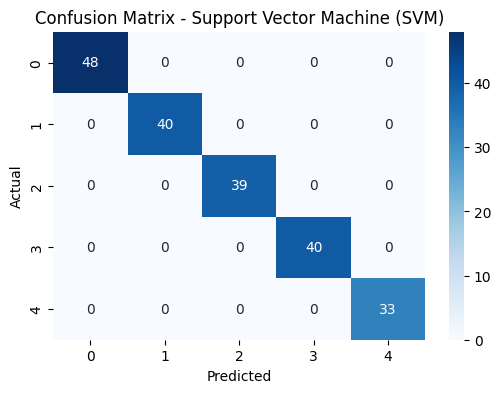

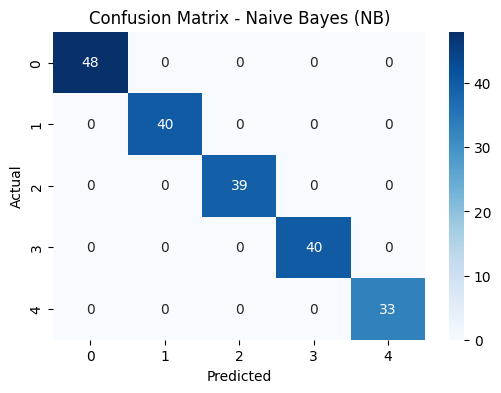

In [25]:
# Membuat visualisasi confusion matrix
for name, result in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [26]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [27]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Perbandingan Performa Model:
                             Accuracy F1-Score
K-Nearest Neighbors (KNN)         1.0      1.0
Decision Tree (DT)                1.0      1.0
Random Forest (RF)                1.0      1.0
Support Vector Machine (SVM)      1.0      1.0
Naive Bayes (NB)                  1.0      1.0


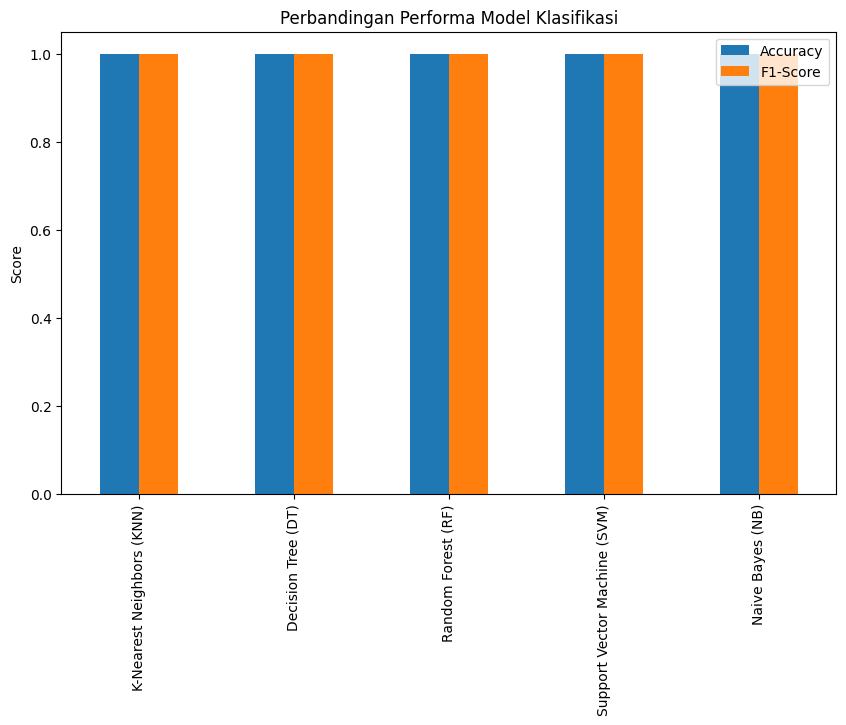

In [29]:
# Membandingkan performa model
evaluation_df = pd.DataFrame(results).T[['Accuracy', 'F1-Score']]
print("Perbandingan Performa Model:")
print(evaluation_df)

# Visualisasi perbandingan performa
evaluation_df.plot(kind='bar', figsize=(10, 6))
plt.title("Perbandingan Performa Model Klasifikasi")
plt.ylabel("Score")
plt.show()


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# **Analisis Hasil Evaluasi Model Klasifikasi**

## **1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**
Pada evaluasi model di atas, semua algoritma menghasilkan nilai **Accuracy** dan **F1-Score** sebesar **1.0**. Hal ini menunjukkan bahwa semua model memiliki performa sempurna pada data uji.

Namun, karena **tuning hyperparameter belum dilakukan**, tidak ada data pembanding untuk melihat peningkatan performa setelah tuning. Untuk evaluasi yang lebih mendalam, perlu dilakukan tuning pada model seperti Random Forest, SVM, atau KNN menggunakan teknik seperti GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi hyperparameter terbaik.

---

## **2. Identifikasi Potensi Kelemahan**
Meskipun hasil menunjukkan performa sempurna, beberapa faktor perlu diperhatikan:

### **a. Overfitting**
- Performanya yang sempurna kemungkinan besar mengindikasikan bahwa model mengalami **overfitting**.
- Overfitting terjadi ketika model belajar terlalu spesifik dari data latih, sehingga tidak dapat bekerja dengan baik pada data baru atau tidak terlihat sebelumnya.
- Perlu dicek apakah data uji dan data latih terlalu serupa atau tidak memiliki variasi yang cukup.

### **b. Ukuran Dataset**
- Jika dataset yang digunakan terlalu kecil, maka model cenderung mudah menghafal pola data daripada melakukan generalisasi.
- Dataset kecil sering kali tidak cukup representatif untuk data di dunia nyata.

### **c. Keseimbangan Dataset**
- Jika dataset **seimbang** antara semua kelas (jumlah data di setiap kelas sama), maka prediksi menjadi lebih mudah.
- Namun, perlu diperiksa apakah distribusi data dalam setiap kelas benar-benar mencerminkan data di kondisi nyata.

---

## **3. Rekomendasi Tindakan Lanjutan**

### **a. Validasi Tambahan**
- **Cross-Validation**: Lakukan **k-fold cross-validation** untuk menguji generalisasi model pada berbagai subset data.
- **Data Eksternal**: Uji model menggunakan dataset baru yang tidak digunakan pada pelatihan sebelumnya.

### **b. Tuning Hyperparameter**
- Lakukan tuning hyperparameter untuk model seperti KNN, SVM, dan Random Forest untuk menghindari potensi overfitting.
- Contoh tuning hyperparameter:
  - **KNN**: n_neighbors
  - **SVM**: kernel, regularisasi (C)
  - **Random Forest**: n_estimators, max_depth

### **c. Tambah Variasi Data**
- Perbesar dataset dengan mengumpulkan lebih banyak data dari berbagai kondisi.
- Pastikan data mencakup variasi yang realistis agar model belajar lebih baik.

### **d. Evaluasi dengan Metrik Lain**
- Gunakan **Precision**, **Recall**, dan **F1-Score** untuk setiap kelas sebagai tambahan evaluasi.
- Fokus pada interpretasi metrik ini untuk memastikan model bekerja baik di setiap kelas, terutama jika data nyata memiliki distribusi tidak seimbang.

---

## **4. Kesimpulan**
Meskipun hasil evaluasi sempurna, perlu tindakan validasi lebih lanjut untuk memastikan model tidak mengalami **overfitting**. Evaluasi menggunakan data tambahan, tuning hyperparameter, dan cross-validation sangat direkomendasikan untuk mengukur performa model secara lebih realistis. Jika hasil tetap sempurna setelah langkah tersebut, maka model dapat dikatakan cukup kuat untuk digunakan.






